In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.combine import SMOTETomek

In [ ]:
df = pd.read_csv('Data.csv', sep = ";")
df = df.drop(df.columns[0],axis=1)

df.head()

,default,housing,loan,y,loan*housing,default*housing,age>60*balance<0,age_group_30-60,age_group_<30,age_group_>60,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,balance_group_0-1000,balance_group_1000-2500,balance_group_2500+,balance_group_<0,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,campaign_group_1,campaign_group_2-3,campaign_group_4-7,campaign_group_7+,pdays_group_0,pdays_group_1,pdays_group_2,pdays_group_3,pdays_group_4,previous_group_0,previous_group_1,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1
2,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1
3,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1


In [ ]:
X = df.loc[:, df.columns != 'y']

y = df['y']

In [ ]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 101)


**Creating different Xtrain and ytrain using SMOTE to address the class imbalance problem**

In [ ]:

smote=SMOTETomek(random_state=42)
X_train1,y_train1= smote.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


**Running the neural network model without addressing the class imbalance problem**

In [ ]:
model = Sequential([
    Dense(128, activation = 'relu', input_shape = [62, ]),
    Dropout(0.2),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2), 
    Dense(16, activation = 'relu'),
    Dropout(0.2), 
    Dense(2, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               8064      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                5

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', 
              metrics = ['accuracy'])

In [ ]:
#Changing the shape of y
y_train = to_categorical(y_train)

#Train Validation Split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size = 0.2, 
                                                    random_state = 101)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model.fit(X_train, y_train, epochs = 100, batch_size = 100, 
          validation_data = (X_val, y_val), verbose=1, callbacks=[early_stop])

Epoch 1/100
290/290 [==============================] - 2s 4ms/step - loss: 0.3436 - accuracy: 0.8835 - val_loss: 0.2950 - val_accuracy: 0.8942
Epoch 2/100
290/290 [==============================] - 1s 3ms/step - loss: 0.3168 - accuracy: 0.8910 - val_loss: 0.2925 - val_accuracy: 0.8945
Epoch 3/100
290/290 [==============================] - 1s 3ms/step - loss: 0.3080 - accuracy: 0.8913 - val_loss: 0.2906 - val_accuracy: 0.8948
Epoch 4/100
290/290 [==============================] - 1s 3ms/step - loss: 0.3020 - accuracy: 0.8927 - val_loss: 0.2892 - val_accuracy: 0.8948
Epoch 5/100
290/290 [==============================] - 1s 4ms/step - loss: 0.2995 - accuracy: 0.8931 - val_loss: 0.2890 - val_accuracy: 0.8947
Epoch 6/100
290/290 [==============================] - 1s 3ms/step - loss: 0.2971 - accuracy: 0.8934 - val_loss: 0.2885 - val_accuracy: 0.8959
Epoch 7/100
290/290 [==============================] - 1s 3ms/step - loss: 0.2935 - accuracy: 0.8929 - val_loss: 0.2892 - val_accuracy: 0.8960

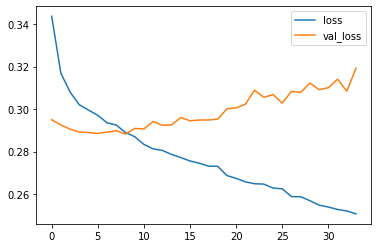

In [ ]:
losses = pd.DataFrame(model.history.history)

losses[['loss','val_loss']].plot()

In [ ]:
#prediction without addressing the class imbalance problem using SMOTE
predictions = model.predict_classes(X_test)

print(classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7944
           1       0.60      0.25      0.35      1099

    accuracy                           0.89      9043
   macro avg       0.75      0.61      0.65      9043
weighted avg       0.87      0.89      0.87      9043



****Running the neural network model after addressing the class imbalance problem using SMOTE****

In [ ]:
#Changing the shape of y
y_train1 = to_categorical(y_train1)

#Train Validation Split
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train1, y_train1, 
                                                    test_size = 0.2, 
                                                    random_state = 101)

In [ ]:
model.fit(X_train1, y_train1, epochs = 100, batch_size = 100, 
          validation_data = (X_val1, y_val1), verbose=1, callbacks=[early_stop])

Epoch 1/100
508/508 [==============================] - 2s 3ms/step - loss: 0.4441 - accuracy: 0.7956 - val_loss: 0.3420 - val_accuracy: 0.8529
Epoch 2/100
508/508 [==============================] - 2s 3ms/step - loss: 0.3493 - accuracy: 0.8511 - val_loss: 0.2707 - val_accuracy: 0.8902
Epoch 3/100
508/508 [==============================] - 2s 3ms/step - loss: 0.2965 - accuracy: 0.8779 - val_loss: 0.2363 - val_accuracy: 0.9029
Epoch 4/100
508/508 [==============================] - 2s 3ms/step - loss: 0.2642 - accuracy: 0.8921 - val_loss: 0.2211 - val_accuracy: 0.9105
Epoch 5/100
508/508 [==============================] - 2s 3ms/step - loss: 0.2485 - accuracy: 0.8999 - val_loss: 0.2127 - val_accuracy: 0.9149
Epoch 6/100
508/508 [==============================] - 2s 3ms/step - loss: 0.2366 - accuracy: 0.9041 - val_loss: 0.2140 - val_accuracy: 0.9142
Epoch 7/100
508/508 [==============================] - 2s 3ms/step - loss: 0.2286 - accuracy: 0.9083 - val_loss: 0.2074 - val_accuracy: 0.9144

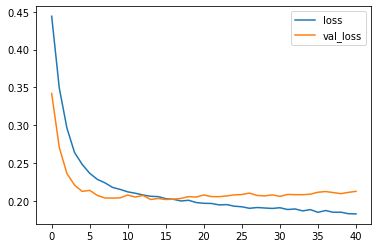

In [ ]:
losses = pd.DataFrame(model.history.history)

losses[['loss','val_loss']].plot()

In [ ]:
#prediction after addressing the class imbalance problem using SMOTE
predictions = model.predict_classes(X_test)

print(classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7944
           1       0.48      0.30      0.37      1099

    accuracy                           0.88      9043
   macro avg       0.69      0.63      0.65      9043
weighted avg       0.86      0.88      0.86      9043

